### Import Library

In [109]:
import pandas as pd
import joblib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [110]:
data = pd.read_csv('dataset/dataset.csv')
data

,provinsi,kabupaten,tahun,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,ACEH,Simeulue,2023,68.06,65.655,9.760,14.28,7686.0
1,ACEH,Aceh Singkil,2023,70.14,67.830,8.655,14.35,9374.0
2,ACEH,Aceh Selatan,2023,68.44,64.860,8.840,14.70,8712.0
3,ACEH,Aceh Tenggara,2023,71.05,68.700,10.100,14.27,8566.0
4,ACEH,Aceh Timur,2023,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...,...,...,...
7191,PAPUA,Puncak,2010,33.44,64.915,0.710,2.84,4752.0
7192,PAPUA,Dogiyai,2010,47.48,64.160,3.360,7.85,4769.0
7193,PAPUA,Intan Jaya,2010,NaN,NaN,NaN,4.12,NaN
7194,PAPUA,Deiyai,2010,NaN,NaN,NaN,9.06,NaN


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7196 entries, 0 to 7195
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   provinsi                    7196 non-null   object 
 1   kabupaten                   7196 non-null   object 
 2   tahun                       7196 non-null   int64  
 3   indeks_pembangunan_manusia  7129 non-null   float64
 4   angka_harapan_hidup         6614 non-null   float64
 5   rerata_lama_sekolah         6614 non-null   float64
 6   harapan_lama_sekolah        6799 non-null   float64
 7   pengeluaran_per_kapita      7129 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 449.9+ KB


In [112]:
data.describe(include=object)

,provinsi,kabupaten
count,7196,7196
unique,34,514
top,JAWA TIMUR,Kota Jayapura
freq,532,14


In [113]:
data.describe()

,tahun,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
count,7196.000000,7129.000000,6614.000000,6614.000000,6799.000000,7129.000000
mean,2016.500000,67.859839,68.996626,7.981120,12.485158,9789.504278
std,4.031409,7.070305,3.665020,1.722349,1.509673,2688.739256
min,2010.000000,19.620000,52.600000,0.250000,1.220000,3214.000000
25%,2013.000000,64.180000,66.766250,6.986250,11.790000,7963.000000
50%,2016.500000,67.790000,69.285000,7.875000,12.530000,9586.000000
75%,2020.000000,71.720000,71.453750,8.985000,13.275000,11242.000000
max,2023.000000,88.280000,78.010000,13.005000,17.930000,24975.000000


### Preprocessinng Data

##### Cek Missing Value

In [114]:
data.isna().sum()

provinsi                        0
kabupaten                       0
tahun                           0
indeks_pembangunan_manusia     67
angka_harapan_hidup           582
rerata_lama_sekolah           582
harapan_lama_sekolah          397
pengeluaran_per_kapita         67
dtype: int64

##### Hapus Missing Value

In [115]:
data = data.dropna()
data

,provinsi,kabupaten,tahun,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,ACEH,Simeulue,2023,68.06,65.655,9.760,14.28,7686.0
1,ACEH,Aceh Singkil,2023,70.14,67.830,8.655,14.35,9374.0
2,ACEH,Aceh Selatan,2023,68.44,64.860,8.840,14.70,8712.0
3,ACEH,Aceh Tenggara,2023,71.05,68.700,10.100,14.27,8566.0
4,ACEH,Aceh Timur,2023,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...,...,...,...
7189,PAPUA,Mamberamo Tengah,2010,39.37,62.175,2.050,5.76,3844.0
7190,PAPUA,Yalimo,2010,38.47,64.590,1.365,5.22,4016.0
7191,PAPUA,Puncak,2010,33.44,64.915,0.710,2.84,4752.0
7192,PAPUA,Dogiyai,2010,47.48,64.160,3.360,7.85,4769.0


##### Cek Duplikasi

In [116]:
data.duplicated().sum()

np.int64(0)

##### Encode 'provinsi' dan 'kabupaten'

In [117]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['provinsi'] = label_encoder.fit_transform(data['provinsi'])
data['kabupaten'] = label_encoder.fit_transform(data['kabupaten'])
data

,provinsi,kabupaten,tahun,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,0,447,2023,68.06,65.655,9.760,14.28,7686.0
1,0,5,2023,70.14,67.830,8.655,14.35,9374.0
2,0,4,2023,68.44,64.860,8.840,14.70,8712.0
3,0,8,2023,71.05,68.700,10.100,14.27,8566.0
4,0,9,2023,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...,...,...,...
7189,23,322,2010,39.37,62.175,2.050,5.76,3844.0
7190,23,513,2010,38.47,64.590,1.365,5.22,4016.0
7191,23,413,2010,33.44,64.915,0.710,2.84,4752.0
7192,23,94,2010,47.48,64.160,3.360,7.85,4769.0


##### Visualisasi Data

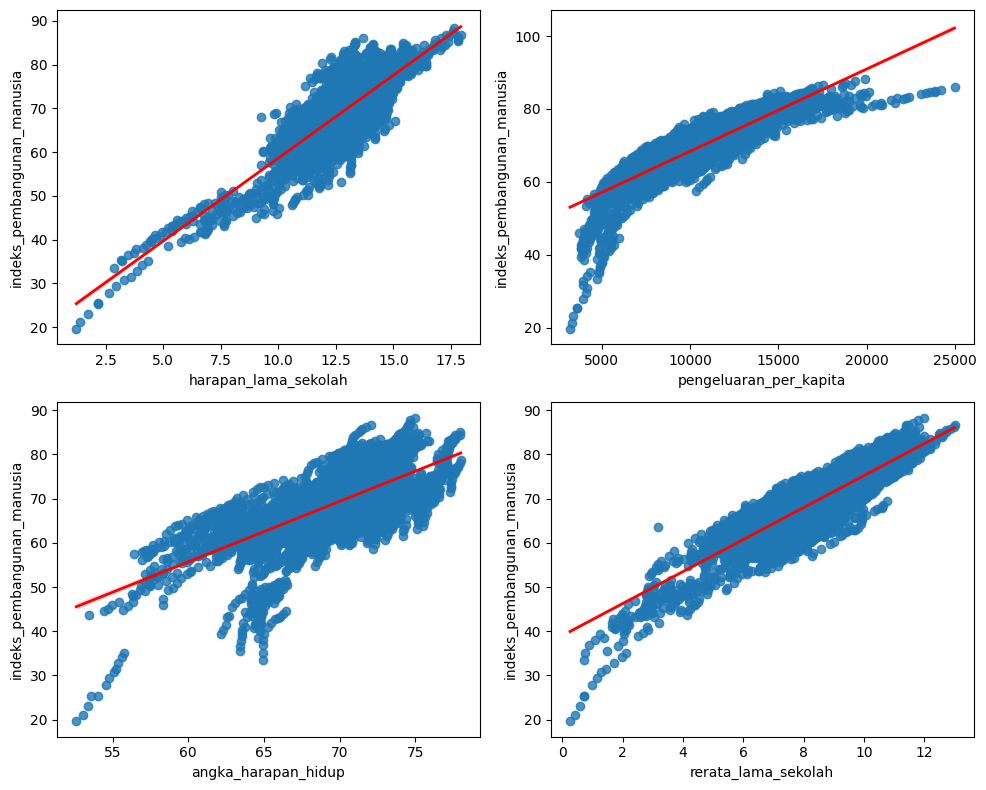

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.regplot(x='harapan_lama_sekolah', y='indeks_pembangunan_manusia', data=data, ax=axes[0,0], line_kws={'color': 'red', 'linewidth': 2})
sns.regplot(x='pengeluaran_per_kapita', y='indeks_pembangunan_manusia', data=data, ax=axes[0,1], line_kws={'color': 'red', 'linewidth': 2})
sns.regplot(x='angka_harapan_hidup', y='indeks_pembangunan_manusia', data=data, ax=axes[1,0], line_kws={'color': 'red', 'linewidth': 2})
sns.regplot(x='rerata_lama_sekolah', y='indeks_pembangunan_manusia', data=data, ax=axes[1,1], line_kws={'color': 'red', 'linewidth': 2})
plt.tight_layout()
plt.show()

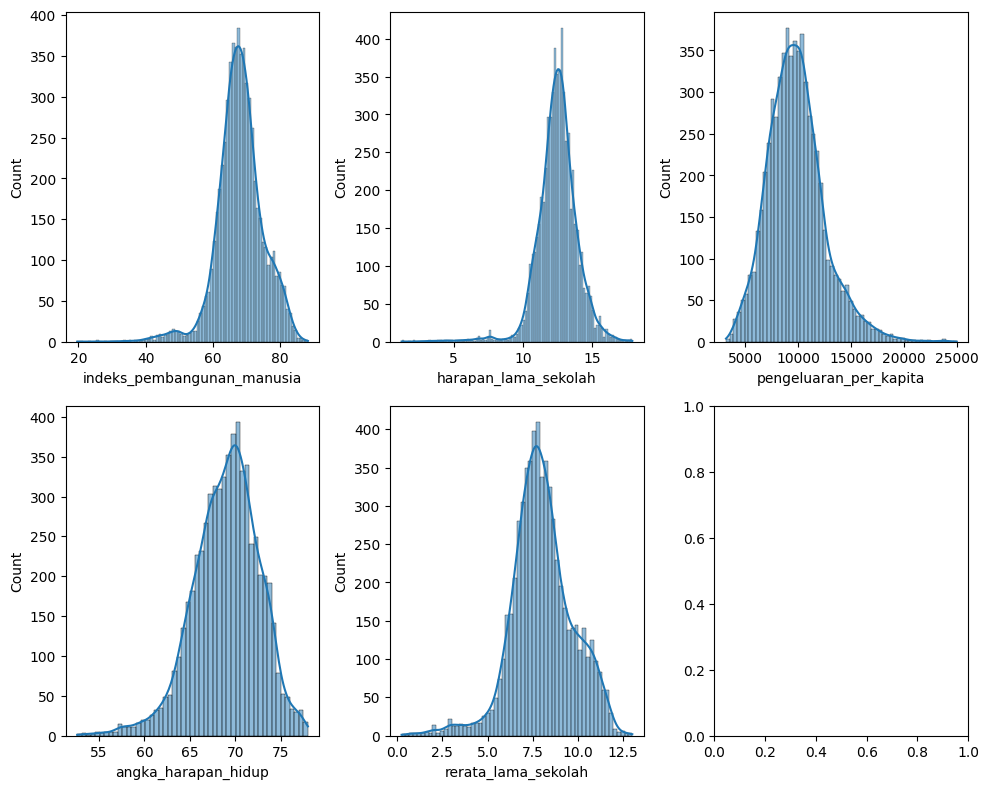

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
sns.histplot(data["indeks_pembangunan_manusia"], kde=True, ax=axes[0, 0])
sns.histplot(data["harapan_lama_sekolah"], kde=True, ax=axes[0, 1])
sns.histplot(data["pengeluaran_per_kapita"], kde=True, ax=axes[0, 2])
sns.histplot(data["angka_harapan_hidup"], kde=True, ax=axes[1, 0])
sns.histplot(data["rerata_lama_sekolah"], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

##### Cek Korelasi Fitur

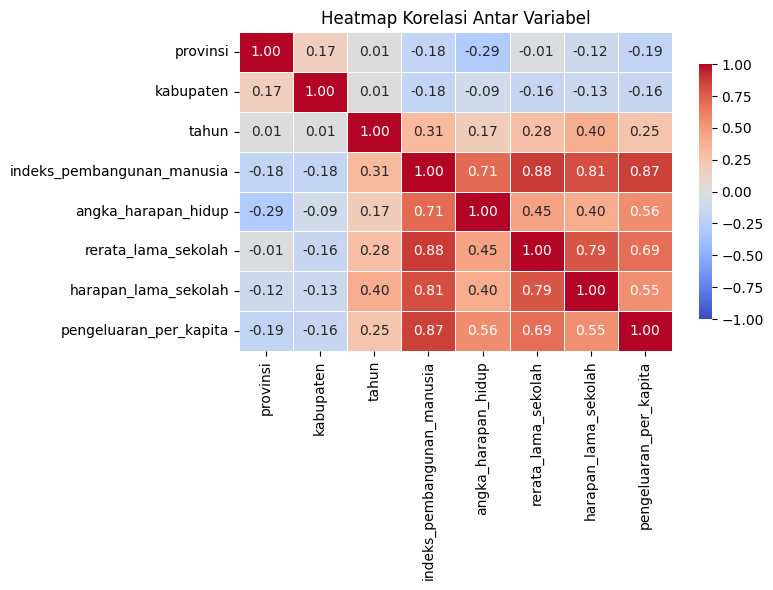

In [120]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Heatmap Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

##### Seleksi Fitur

In [121]:
data = data.drop(columns= ['provinsi', 'kabupaten', 'tahun'])
data

,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,68.06,65.655,9.760,14.28,7686.0
1,70.14,67.830,8.655,14.35,9374.0
2,68.44,64.860,8.840,14.70,8712.0
3,71.05,68.700,10.100,14.27,8566.0
4,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...
7189,39.37,62.175,2.050,5.76,3844.0
7190,38.47,64.590,1.365,5.22,4016.0
7191,33.44,64.915,0.710,2.84,4752.0
7192,47.48,64.160,3.360,7.85,4769.0


##### Cek Outlier

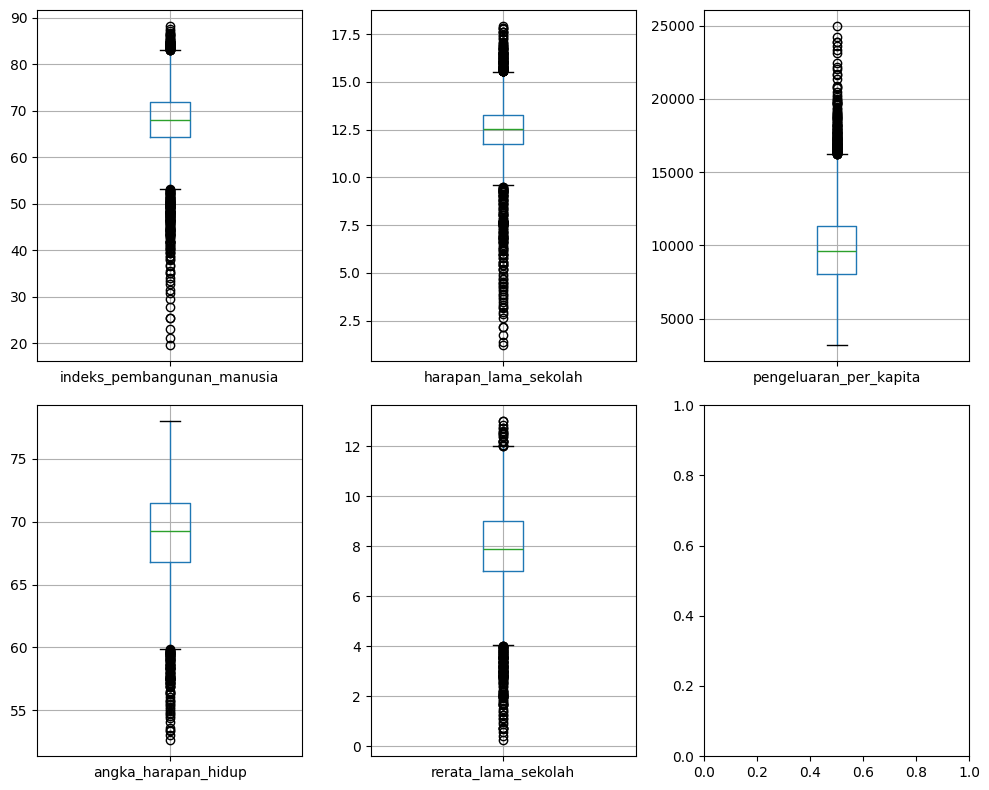

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
data.boxplot(column=["indeks_pembangunan_manusia"], ax=axes[0, 0])
data.boxplot(column=["harapan_lama_sekolah"], ax=axes[0, 1])
data.boxplot(column=["pengeluaran_per_kapita"], ax=axes[0, 2])
data.boxplot(column=["angka_harapan_hidup"], ax=axes[1, 0])
data.boxplot(column=["rerata_lama_sekolah"], ax=axes[1, 1])
plt.tight_layout()
plt.show()

##### Hapus Outlier

In [123]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
condition = ~((data < (Q1 - 1.5 *IQR)) | (data > (Q3 + 1.5 *IQR))).any(axis=1)
data = data.loc[condition]

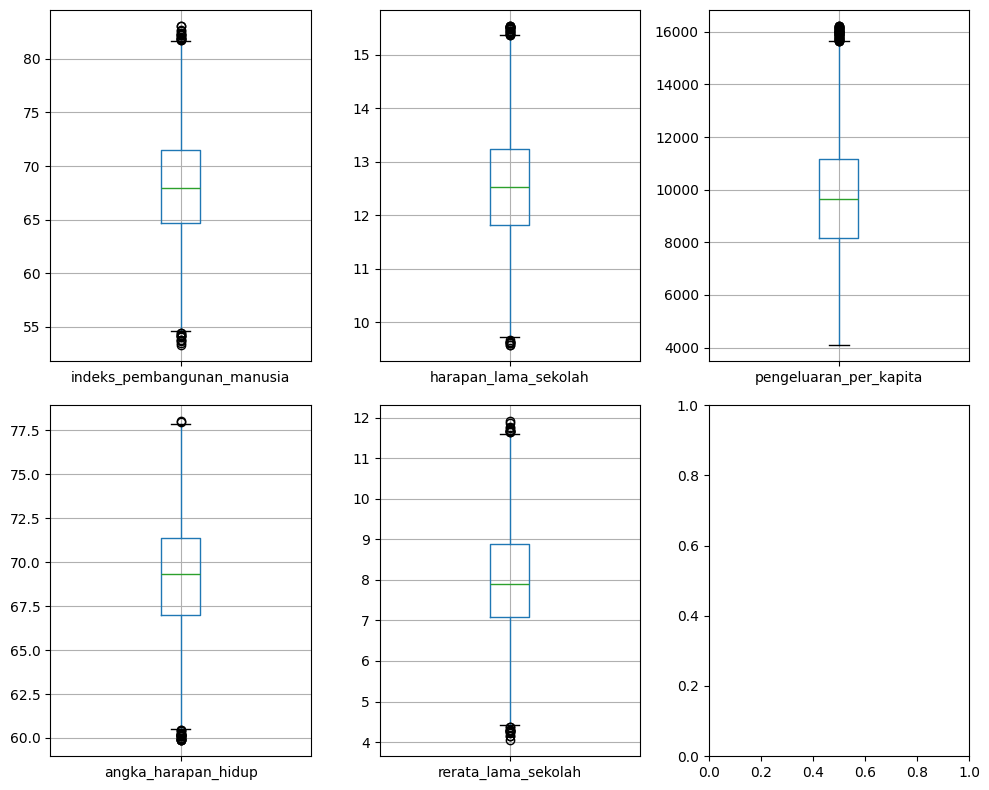

In [124]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
data.boxplot(column=["indeks_pembangunan_manusia"], ax=axes[0, 0])
data.boxplot(column=["harapan_lama_sekolah"], ax=axes[0, 1])
data.boxplot(column=["pengeluaran_per_kapita"], ax=axes[0, 2])
data.boxplot(column=["angka_harapan_hidup"], ax=axes[1, 0])
data.boxplot(column=["rerata_lama_sekolah"], ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [125]:
data

,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,68.06,65.655,9.760,14.28,7686.0
1,70.14,67.830,8.655,14.35,9374.0
2,68.44,64.860,8.840,14.70,8712.0
3,71.05,68.700,10.100,14.27,8566.0
4,69.32,69.120,8.490,13.07,9436.0
...,...,...,...,...,...
7182,56.98,65.310,5.825,10.07,6190.0
7183,60.00,65.825,4.830,11.23,8307.0
7184,59.98,65.420,7.970,11.16,5803.0
7185,57.71,64.990,6.705,11.88,4927.0


##### Pemisahan Fitur dan Target

In [126]:
X = data.drop(columns='indeks_pembangunan_manusia')
X

,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,65.655,9.760,14.28,7686.0
1,67.830,8.655,14.35,9374.0
2,64.860,8.840,14.70,8712.0
3,68.700,10.100,14.27,8566.0
4,69.120,8.490,13.07,9436.0
...,...,...,...,...
7182,65.310,5.825,10.07,6190.0
7183,65.825,4.830,11.23,8307.0
7184,65.420,7.970,11.16,5803.0
7185,64.990,6.705,11.88,4927.0


In [127]:
y = data['indeks_pembangunan_manusia']
y

0       68.06
1       70.14
2       68.44
3       71.05
4       69.32
        ...  
7182    56.98
7183    60.00
7184    59.98
7185    57.71
7195    76.69
Name: indeks_pembangunan_manusia, Length: 5790, dtype: float64

##### Normalisasi Data

In [128]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
df_X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
joblib.dump(scaler, 'fitur_mmscaler_model.pkl')

['fitur_mmscaler_model.pkl']

In [129]:
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))
df_y_normalized = pd.DataFrame(y_normalized, columns=['y_normalized'])
joblib.dump(scaler, 'target_mmscaler_y.pkl')

['target_mmscaler_y.pkl']

In [130]:
df_X_normalized

,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,0.318721,0.725714,0.788591,0.295811
1,0.438655,0.585397,0.800336,0.435016
2,0.274883,0.608889,0.859060,0.380422
3,0.486628,0.768889,0.786913,0.368382
4,0.509788,0.564444,0.585570,0.440129
...,...,...,...,...
5785,0.299697,0.226032,0.082215,0.172439
5786,0.328095,0.099683,0.276846,0.347023
5787,0.305762,0.498413,0.265101,0.140524
5788,0.282051,0.337778,0.385906,0.068283


In [131]:
df_X_normalized.describe()

,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
count,5790.000000,5790.000000,5790.000000,5790.000000
mean,0.512061,0.508760,0.498818,0.465446
std,0.179688,0.177062,0.184639,0.181620
min,0.000000,0.000000,0.000000,0.000000
25%,0.393783,0.386032,0.377517,0.334880
50%,0.520127,0.490159,0.496644,0.457034
75%,0.633030,0.615873,0.615772,0.581725
max,1.000000,1.000000,1.000000,1.000000


In [132]:
df_y_normalized

,y_normalized
0,0.495804
1,0.565626
2,0.508560
3,0.596173
4,0.538100
...,...
5785,0.123867
5786,0.225243
5787,0.224572
5788,0.148372


In [133]:
df_y_normalized.describe()

,y_normalized
count,5790.000000
mean,0.502609
std,0.176639
min,0.000000
25%,0.383686
50%,0.492447
75%,0.611615
max,1.000000


##### Menyimpan hasil normalisasi dan pemisahan data

In [134]:
df_X_normalized.to_csv('dataset/fitur.csv', index=False)
df_y_normalized.to_csv('dataset/target.csv', index=False)